### Content

### 1. Import libraries and datasets
### 2. Create a correlation matrix heatmap
### 3. Create a scatterplot
### 4. Create a pair plot of the entire data set
### 5. Create a categorical plot
### 6. Interpretation of Results

---

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# String for Main Project Folder
path = r'C:\Users\ifari\12-2022 University Rankings'

In [3]:
# String to import Data Folder containing cwur_data.csv
df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_checked.csv'), index_col = False)
df_the = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'the_checked.csv'), index_col = False)
df_awu = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'awu_checked.csv'), index_col = False)
df_school_country = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'school_country_checked.csv'), index_col = False)
df_attainment = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'attainment_checked.csv'), index_col = False)
df_expend = pd.read_csv(open(os.path.join(path, '02 Data', 'Prepared Data', 'expend_checked.csv')), index_col = False)

In [4]:
df_cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2200 non-null   int64  
 1   world_rank            2200 non-null   int64  
 2   institution           2200 non-null   object 
 3   country               2200 non-null   object 
 4   national_rank         2200 non-null   int64  
 5   quality_of_education  2200 non-null   int64  
 6   alumni_employment     2200 non-null   int64  
 7   quality_of_faculty    2200 non-null   int64  
 8   publications          2200 non-null   int64  
 9   influence             2200 non-null   int64  
 10  citations             2200 non-null   int64  
 11  broad_impact          2000 non-null   float64
 12  patents               2200 non-null   int64  
 13  score                 2200 non-null   float64
 14  year                  2200 non-null   int64  
dtypes: float64(2), int64(

In [5]:
# Drop Unnamed: 0 column
df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])
df_cwur.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [6]:
# Replace all characters containing 'USA' with 'United States of America'
df_cwur = df_cwur.replace('USA', 'United States of America', regex = True)
df_cwur.head(20)

world_rank                                      institution  \
0            1                               Harvard University   
1            2            Massachusetts Institute of Technology   
2            3                              Stanford University   
3            4                          University of Cambridge   
4            5               California Institute of Technology   
5            6                             Princeton University   
6            7                             University of Oxford   
7            8                                  Yale University   
8            9                              Columbia University   
9           10               University of California, Berkeley   
10          11                            University of Chicago   
11          12                               Cornell University   
12          13                       University of Pennsylvania   
13          14                              University of Tokyo   
14          15                         Johns Hopkins University   
15          16  Swiss Federal Institute of Technology in Zurich   
16          17                                 Kyoto University   
17          18                    Weizmann Institute of Science   
18          19            University of California, Los Angeles   
19          20              University of California, San Diego   

                     country  national_rank  quality_of_education  \
0   United States of America              1                     7   
1   United States of America              2                     9   
2   United States of America              3                    17   
3             United Kingdom              1                    10   
4   United States of America              4                     2   
5   United States of America              5                     8   
6             United Kingdom              2                    13   
7   United States of America              6                    14   
8   United States of America              7                    23   
9   United States of America              8                    16   
10  United States of America              9                    15   
11  United States of America             10                    21   
12  United States of America             11                    31   
13                     Japan              1                    32   
14  United States of America             12                    34   
15               Switzerland              1                    26   
16                     Japan              2                    42   
17                    Israel              1                     4   
18  United States of America             13                    62   
19  United States of America             14                    61   

    alumni_employment  quality_of_faculty  publications  influence  citations  \
0                   9                   1             1          1          1   
1                  17                   3            12          4          4   
2                  11                   5             4          2          2   
3                  24                   4            16         16         11   
4                  29                   7            37         22         22   
5                  14                   2            53         33         26   
6                  28                   9            15         13         19   
7                  31                  12            14          6         15   
8                  21                  10            13         12         14   
9                  52                   6             6          5          3   
10                 26                   8            34         20         28   
11                 42                  14            22         21         16   
12                 16                  24             9         10          8   
13          

---

### 2. Create a correlation matrix heatmap

In [7]:
# List of columns
df_cwur.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [8]:
# Create a subset excluding categorical variables
sub = df_cwur[['world_rank', 'national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty','publications', 'influence', 'citations', 'broad_impact', 'patents', 'score', 'year']]

In [9]:
# Create a correlation matrix using pandas
sub.corr()

world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
publications            0.923037       0.326857              0.624657   
influence               0.895871       0.161086              0.645641   
citations               0.856573       0.186797              0.630455   
broad_impact            0.942998       0.173043              0.521615   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   
year                    0.320844       0.102951              0.427732   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668529            0.663864      0.923037   
national_rank                  0.135342            0.222833      0.326857   
quality_of_education           0.606421            0.786181      0.624657   
alumni_employment              1.000000            0.558618      0.572096   
quality_of_faculty             0.558618            1.000000      0.634423   
publications                   0.572096            0.634423      1.000000   
influence                      0.527382            0.656406      0.874952   
citations                      0.559200            0.652186      0.829912   
broad_impact                   0.423619            0.549345      0.917878   
patents                        0.528219            0.555107      0.671558   
score                         -0.510374           -0.693540     -0.522111   
year                           0.427710            0.484788      0.318245   

                      influence  citations  broad_impact   patents     score  \
world_rank             0.895871   0.856573      0.942998  0.698214 -0.549098   
national_rank          0.161086   0.186797      0.173043  0.159440 -0.199756   
quality_of_education   0.645641   0.630455      0.521615  0.528120 -0.600541   
alumni_employment      0.527382   0.559200      0.423619  0.528219 -0.510374   
quality_of_faculty     0.656406   0.652186      0.549345  0.555107 -0.693540   
publications           0.874952   0.829912      0.917878  0.671558 -0.522111   
influence              1.000000   0.845207      0.916040  0.611811 -0.522837   
citations              0.845207   1.000000      0.852638  0.598728 -0.522438   
broad_impact           0.916040   0.852638      1.000000  0.562861 -0.531590   
patents                0.611811   0.598728      0.562861  1.000000 -0.474810   
score                 -0.522837  -0.522438     -0.531590 -0.474810  1.000000   
year                   0.318298   0.328771     -0.000124  0.368570 -0.239136   

                          year  
world_rank            0.320844  
national_rank         0.102951  
quality_of_education  0.427732  
alumni_employment     0.427710  
quality_of_faculty    0.484788  
publications          0.318245  
influence             0.318298  
citations             0.328771  
broad_impact         -0.000124  
patents               0.368570  
score                -0.239136  
year                  1.000000

In [10]:
# Dimensions
sub.shape

(2200, 12)

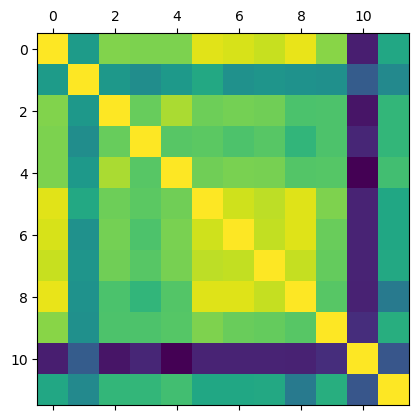

In [11]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

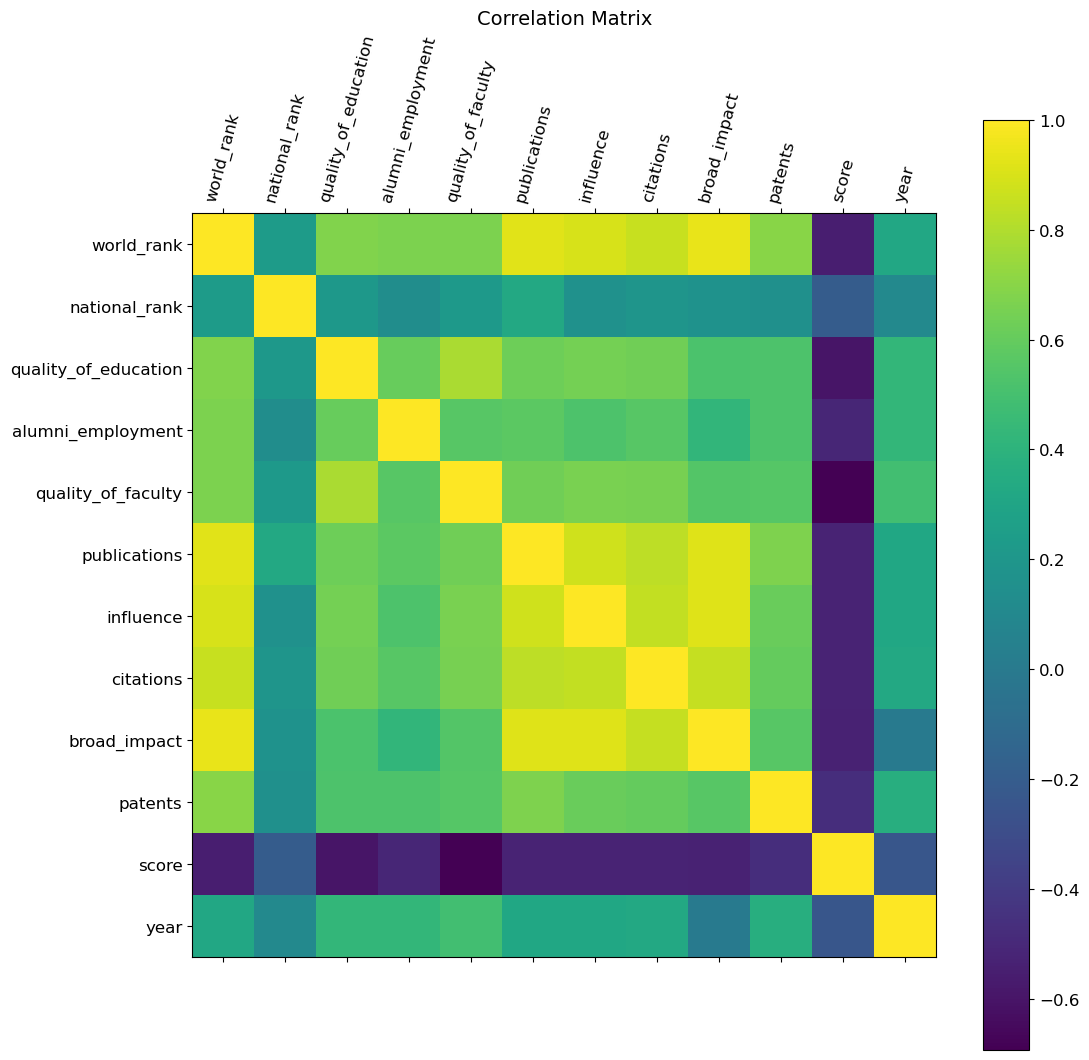

In [12]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize = (12, 12)) # figure size 
plt.matshow(sub.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize = 12, rotation = 75) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize = 12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 12) # add font size
plt.title('Correlation Matrix', fontsize = 14) # add title

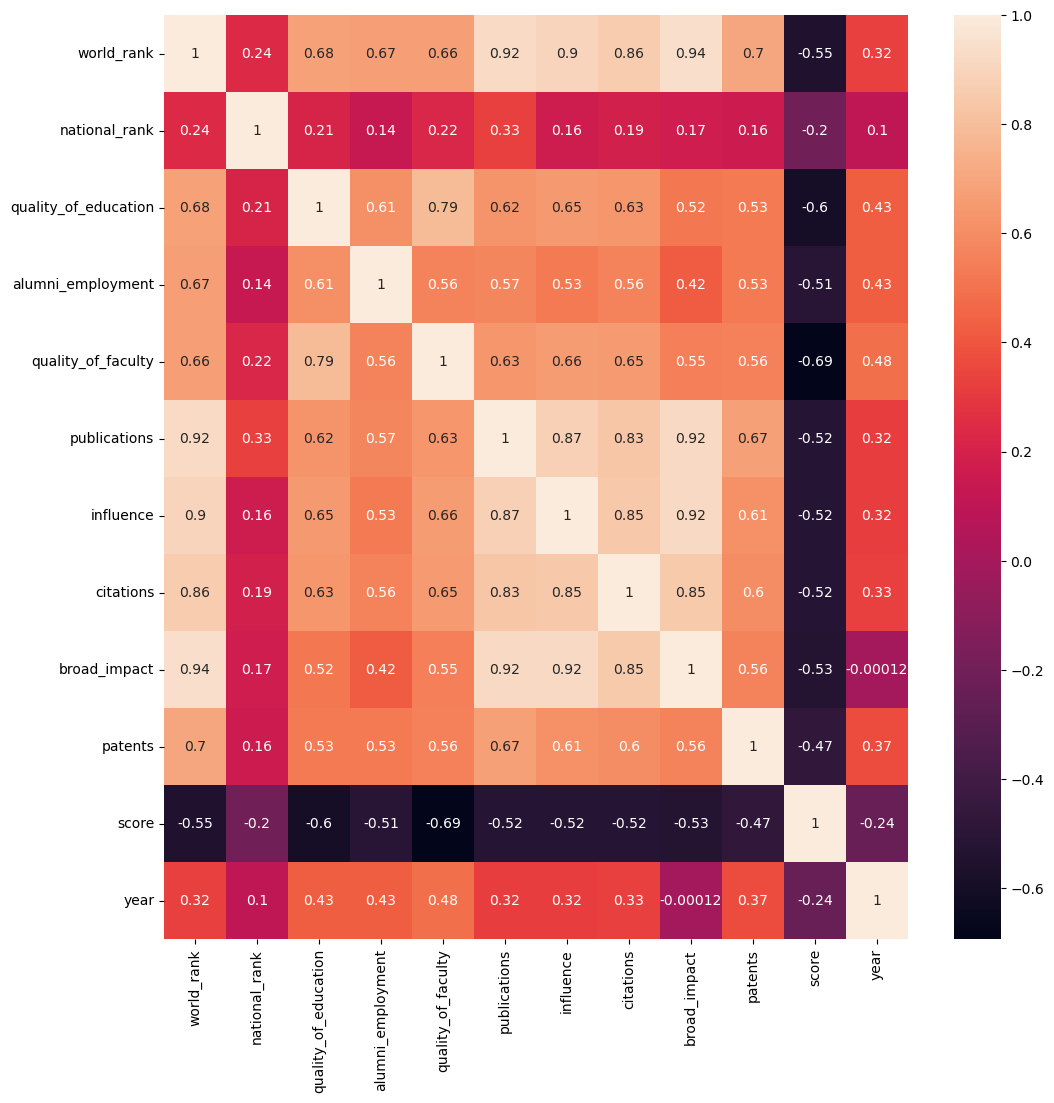

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize = (12, 12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

> The strongest positive correlation exists between the variables 'broad_impact' and 'world_rank' indicating that 'broad_impact' moves in the same direction as the 'world_rank'. This makes sense as the universities with the higher ranking seem to impact society broadly. There is also a positive relationship between 'broad_impact' and 'publications' and 'influence.' Another correlation exists between 'world_rank' and 'publications' and 'influence.' Overall, the more impact the university makes in society through publications, influence, and broad effect.

> The strongest negative correlation exists between 'score' and 'quality_of_faculty.' A university's overall score used to determine 'world_rank' is moving in a different direction than the 'quality_of_faculty.' Surprisingly,' score' has a negative relationship with every variable. There is also another negative relationship between 'broad_impact' and 'year,' indicating that as years go by, the amount of impact from the university affects their rank less.

---

### 3. Create a scatterplot

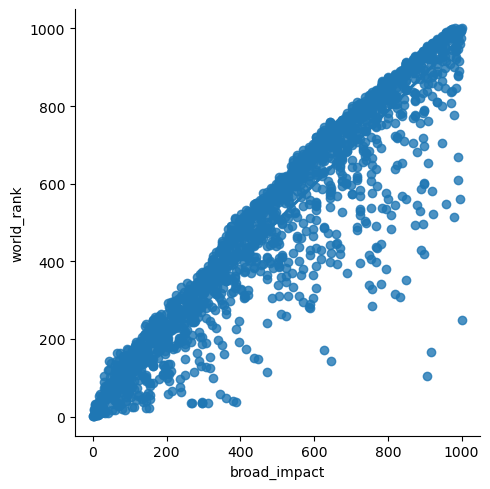

In [14]:
# Create a scatterplot for the "broad_impact" and "world_rank" columns in seaborn
sns.lmplot(x = 'broad_impact', y = 'world_rank', data = df_cwur)

> The scatterplot shows a positive relationship between 'broad_impact' and 'world_rank.' As 'broad_impact' increases, so do 'world_rank.' Most data points are close to the trend line, indicating a strong relationship; however, there are some outliers. This suggests that 'world_rank' closely follows the 'broad_impact' in the society of the university.

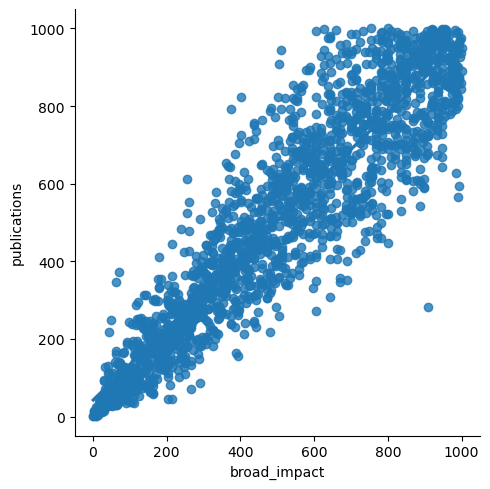

In [15]:
# Create a scatterplot for the "broad_impact" and "publications" columns in seaborn
sns.lmplot(x = 'broad_impact', y = 'publications', data = df_cwur)

> The scatterplot shows a moderate/strong relationship between 'broad_impact' and 'publications.' For the most part, the more 'board_impact' is shown in society from the university; one can assume the amount of 'publications' is increasing.

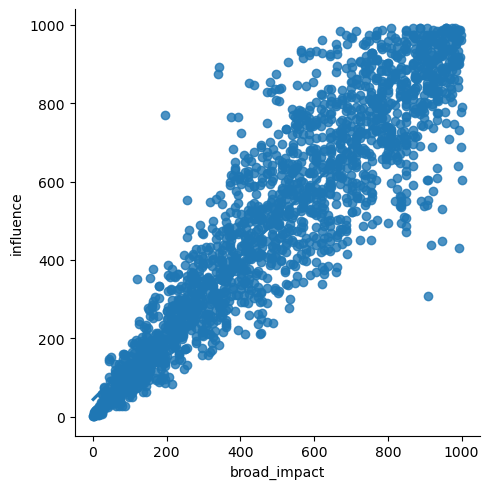

In [16]:
# Create a scatterplot for the "broad_impact" and "influence" columns in seaborn
sns.lmplot(x = 'broad_impact', y = 'influence', data = df_cwur)

> The scatterplot shows a moderate/strong relationship between 'broad_impact' and 'influence.' For the most part, the more 'board_impact is shown in society by the university; one can assume the amount of 'influence' the university has in society is increasing.

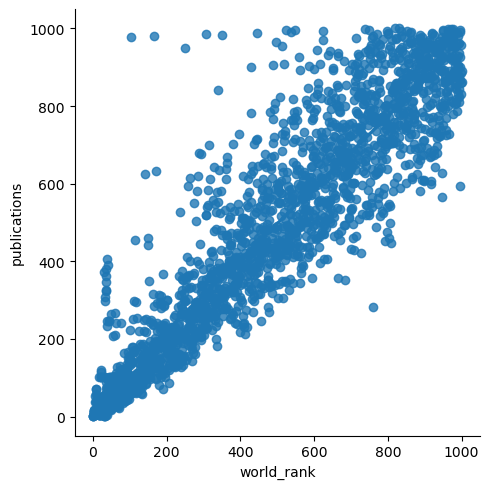

In [17]:
# Create a scatterplot for the "world_rank" and "publications" columns in seaborn
sns.lmplot(x = 'world_rank', y = 'publications', data = df_cwur)

> The scatterplot shows a positive relationship between 'world_rank' and 'publications.' As 'world_rank' increases, so do 'publications.' Most data points are close to the trend line, indicating a strong relationship; however, there are some outliers. This suggests that 'world_rank' closely follows the amount of published 'publications' by the university.

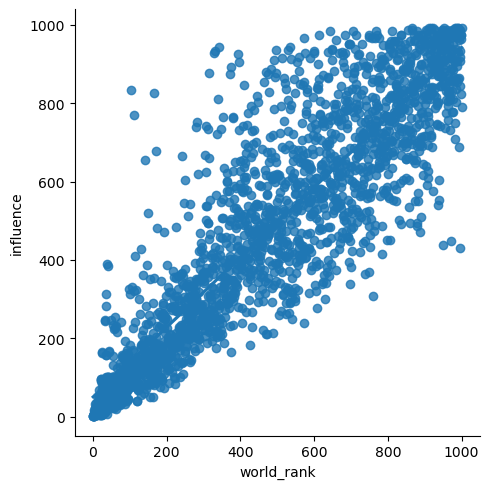

In [18]:
# Create a scatterplot for the "world_rank" and "influence" columns in seaborn
sns.lmplot(x = 'world_rank', y = 'influence', data = df_cwur)

> The scatterplot shows a moderate/strong relationship between 'world_rank' and 'influence.' For the most part, with the higher 'world_rank' score, one can assume the university has a significant 'influence' in society.

---

### 4. Create a pair plot of the entire data set

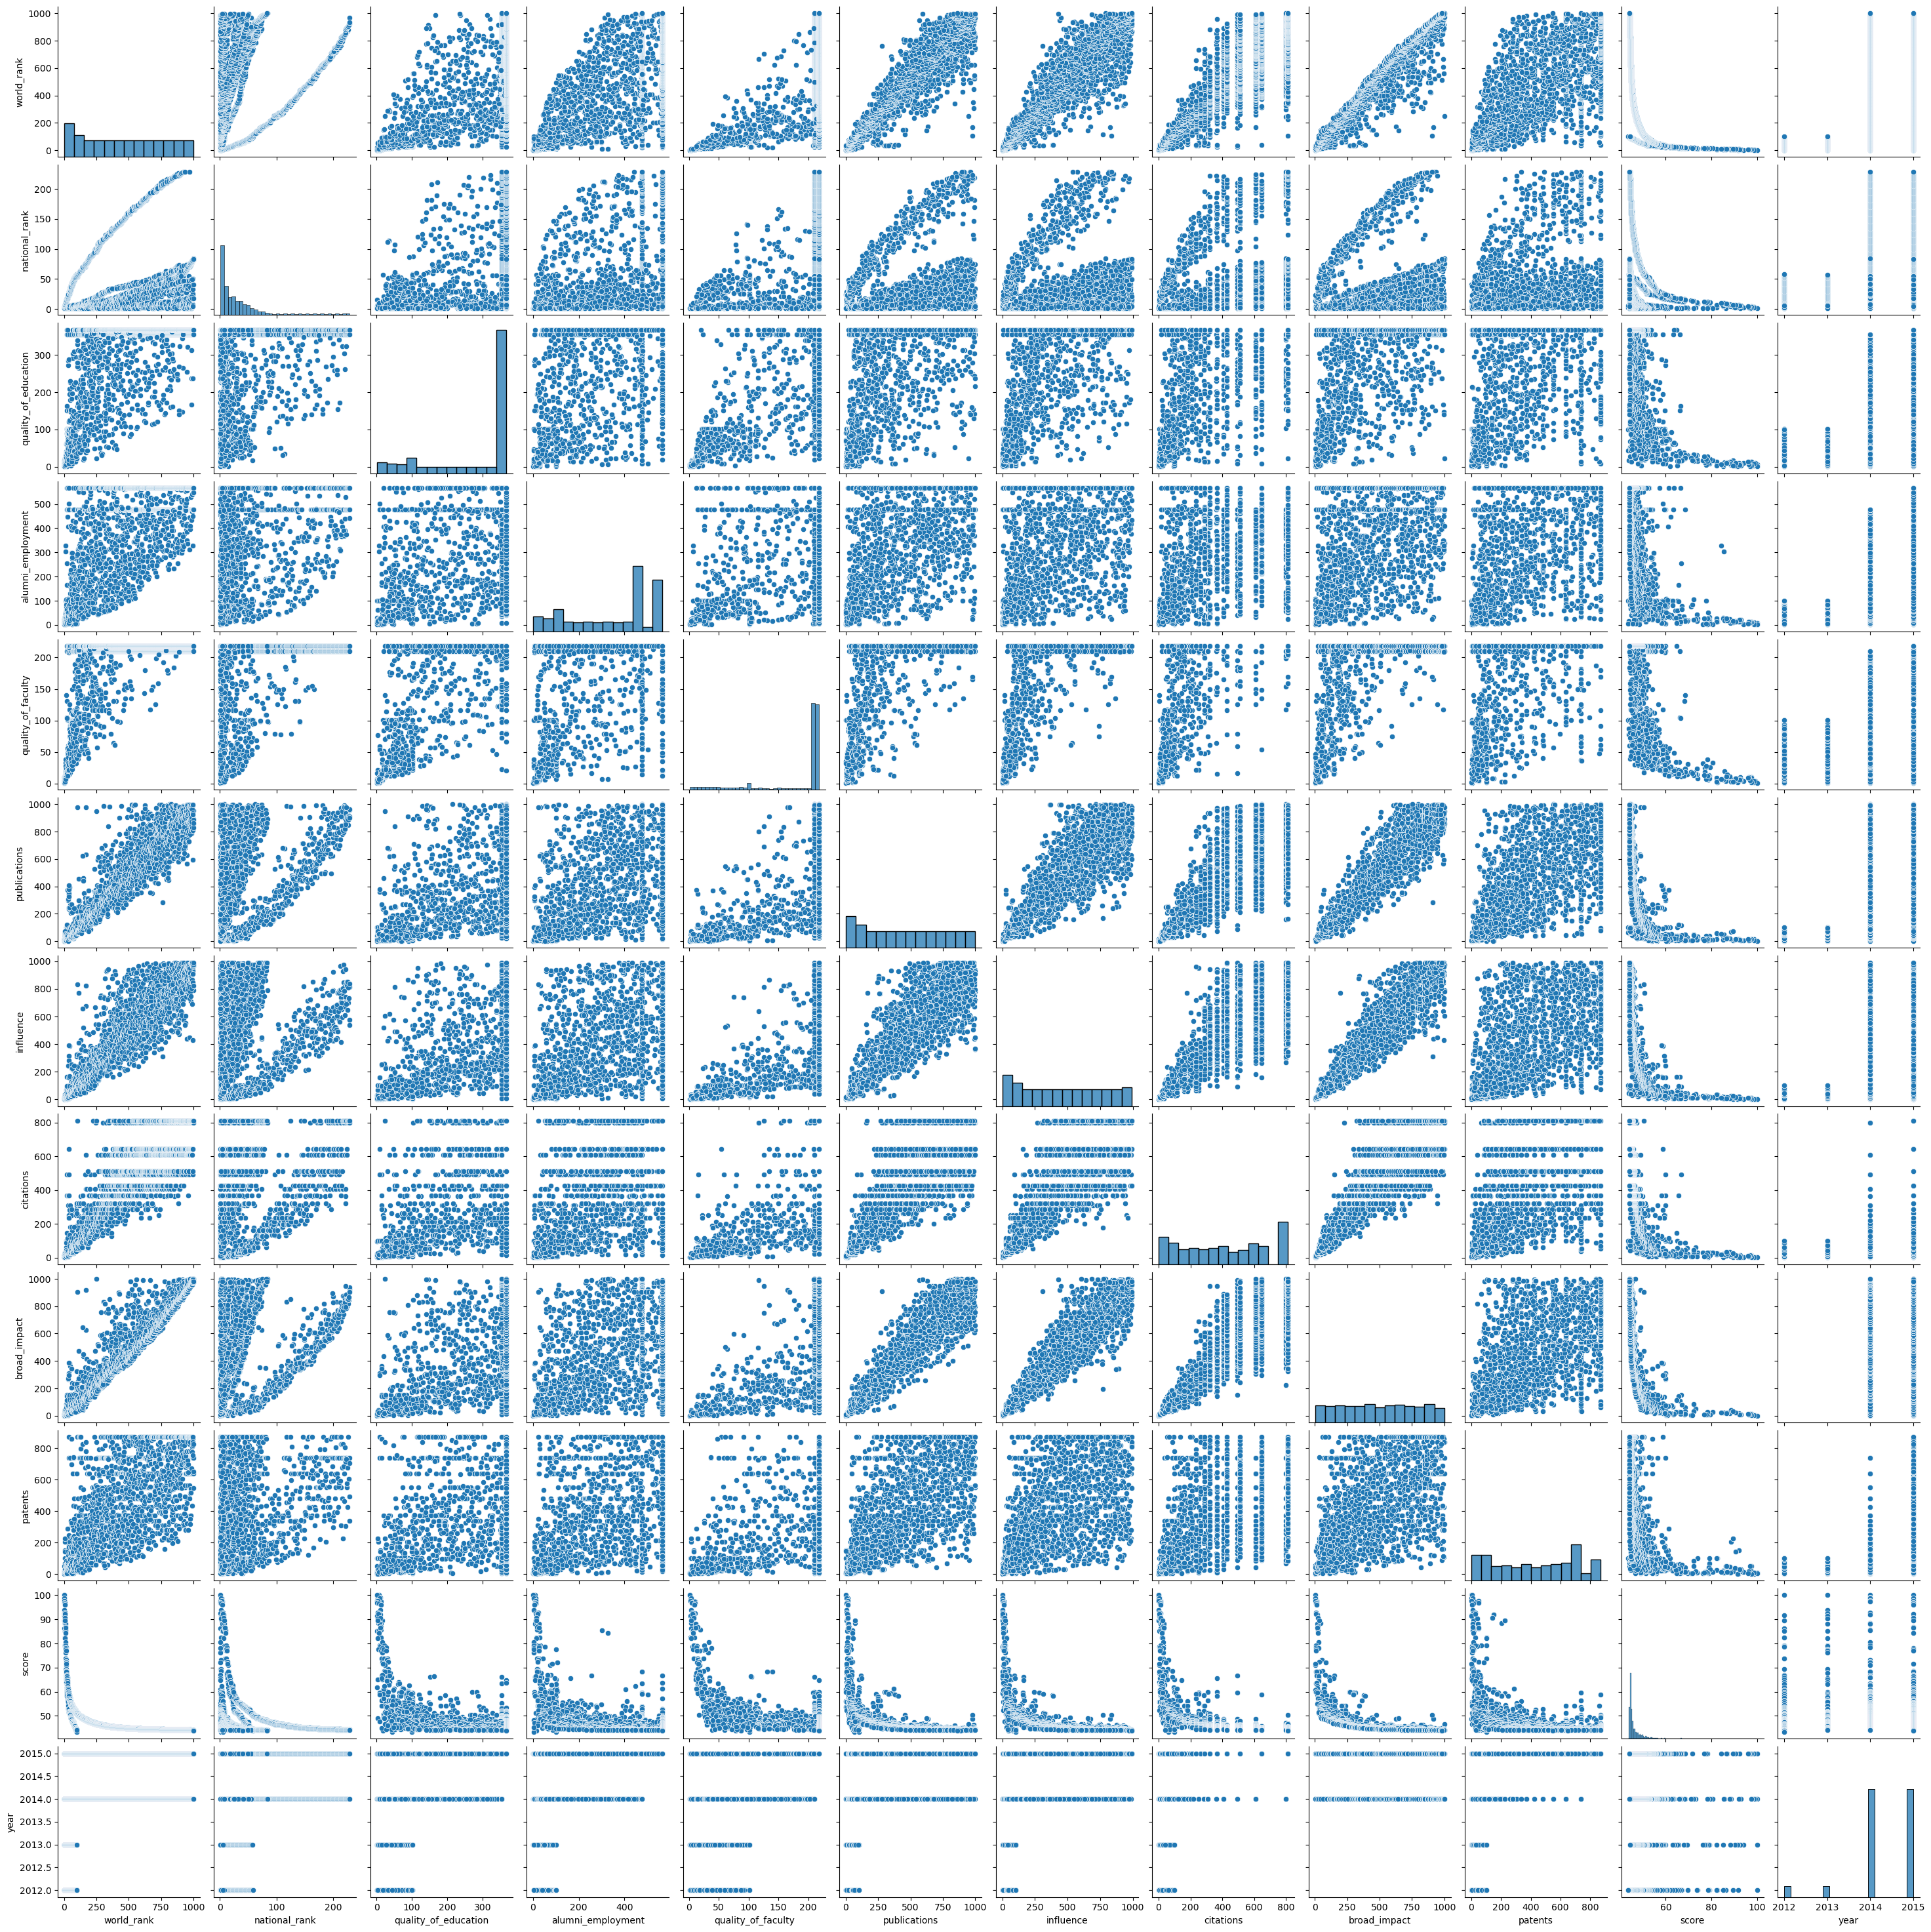

In [19]:
# Create a pair plot 
pair_plot = sns.pairplot(df_cwur)

> This pair plot shows more variables and a more comprehensive selection of scatterplot relationships between all variables in the dataframe. Another connection to explore would be between 'publications' and 'influence,' as there is a moderate positive relationship between the two variables.

In [20]:
# Exporting pair plot
pair_plot.figure.savefig(os.path.join(path, '04 Analysis','pair_plot.png'),bbox_inches = 'tight')

---

### 5. Create a categorical plot

<AxesSubplot:xlabel='patents', ylabel='Count'>

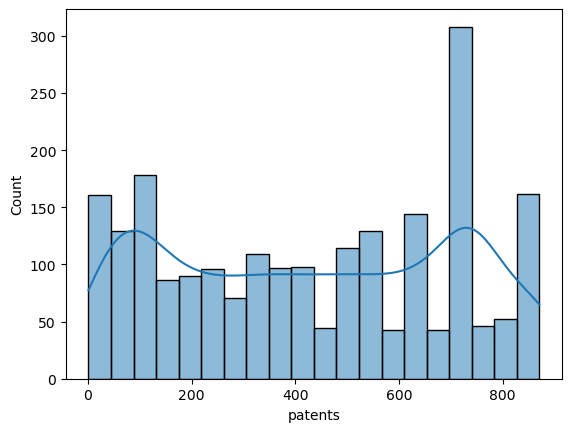

In [21]:
# Create a histogram of country variable 
sns.histplot(df_cwur['patents'], bins = 20, kde = True)

In [22]:
df_cwur['patents'].describe()

count    2200.000000
mean      433.346364
std       273.996525
min         1.000000
25%       170.750000
50%       426.000000
75%       714.250000
max       871.000000
Name: patents, dtype: float64

In [23]:
# Create a categorical variable of patents with categories for Low, Medium, and High volume of patents
df_cwur.loc[df_cwur['patents'] < 170, 'Patent Category'] = 'Low-Volume'
df_cwur.loc[(df_cwur['patents'] >= 170) & (df_cwur['patents'] < 714), 'Patent Category'] = 'Medium-Volume'
df_cwur.loc[df_cwur['patents'] > 714, 'Patent Category'] = 'High-volume'

In [24]:
# Checking the distribution of the Patent category variable 
df_cwur['Patent Category'].value_counts(dropna = False)

Medium-Volume    1111
High-volume       550
Low-Volume        538
NaN                 1
Name: Patent Category, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the duration categories created above
sns.set(style = "ticks")
cat_plot = sns.catplot(x = "world_rank", y = "patents", hue = "Patent Category", data = df_cwur)

---

### 6. Interpretation of Results

> Revisit the questions previously generated: Unfortunately, known of my quesitons were answered in this task.

> Add any new questions: New questions that arised during the completion of this task are which attributes have the most affect on national and world rankings of the universities?

> Hypotheses: (1) If university have more influence and broad impact in society, their world rank will increase. (2) If a university is ranked in the top 5 universities, then their influence and broad impact will scored high on average.